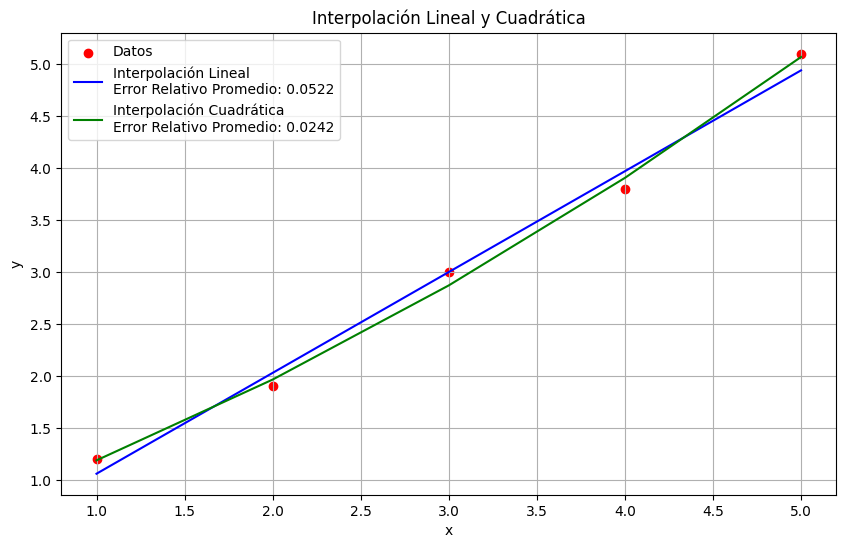

Error Relativo Promedio (Interpolación Lineal): 0.0522
Error Relativo Promedio (Interpolación Cuadrática): 0.0242


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de ejemplo (pueden ser reemplazados por cualquier conjunto de puntos)
x = np.array([1, 2, 3, 4, 5])
y = np.array([1.2, 1.9, 3.0, 3.8, 5.1])

# Interpolación lineal
A_lineal = np.vstack([x, np.ones(len(x))]).T
params_lineal = np.linalg.lstsq(A_lineal, y, rcond=None)[0]
f_lineal = params_lineal[0] * x + params_lineal[1]

# Interpolación cuadrática
A_cuadratica = np.vstack([x**2, x, np.ones(len(x))]).T
params_cuadratica = np.linalg.lstsq(A_cuadratica, y, rcond=None)[0]
f_cuadratica = params_cuadratica[0] * x**2 + params_cuadratica[1] * x + params_cuadratica[2]

# Calcular el error relativo
error_relativo_lineal = np.abs((y - f_lineal) / y)
error_relativo_cuadratica = np.abs((y - f_cuadratica) / y)

# Promedio del error relativo
promedio_error_relativo_lineal = np.mean(error_relativo_lineal)
promedio_error_relativo_cuadratica = np.mean(error_relativo_cuadratica)

# Graficar los puntos y las interpolaciones
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='red', label='Datos')
plt.plot(x, f_lineal, label=f'Interpolación Lineal\nError Relativo Promedio: {promedio_error_relativo_lineal:.4f}', color='blue')
plt.plot(x, f_cuadratica, label=f'Interpolación Cuadrática\nError Relativo Promedio: {promedio_error_relativo_cuadratica:.4f}', color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Interpolación Lineal y Cuadrática')
plt.grid(True)
plt.show()

# Imprimir los errores relativos promedios
print(f'Error Relativo Promedio (Interpolación Lineal): {promedio_error_relativo_lineal:.4f}')
print(f'Error Relativo Promedio (Interpolación Cuadrática): {promedio_error_relativo_cuadratica:.4f}')


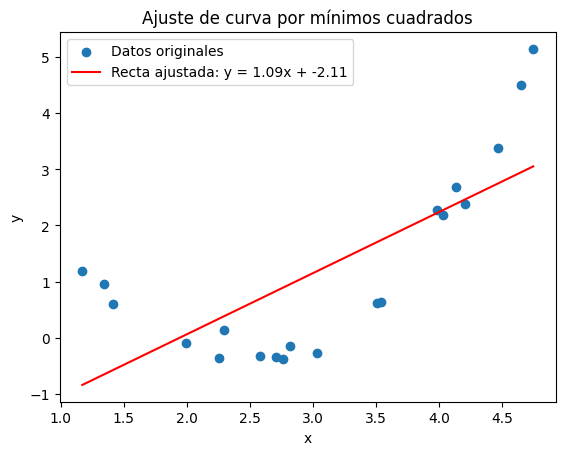

In [3]:
import matplotlib.pyplot as plt

def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float]:
    n = len(xs)
    c_1 = sum(xs)
    c_0 = n
    c_ind = sum(ys)
    return (c_1, c_0, c_ind)

def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float]:
    c_1 = sum(x**2 for x in xs)
    c_0 = sum(xs)
    c_ind = sum(x*y for x, y in zip(xs, ys))
    return (c_1, c_0, c_ind)

def ajustar_min_cuadrados(xs: list, ys: list, gradientes: list) -> tuple[float]:
    # Resolviendo el sistema de ecuaciones lineales
    A = []
    b = []
    for grad in gradientes:
        c_1, c_0, c_ind = grad(xs, ys)
        A.append([c_1, c_0])
        b.append(c_ind)

    # Método manual para resolver 2x2 sistema de ecuaciones
    det_A = A[0][0]*A[1][1] - A[0][1]*A[1][0]
    if det_A == 0:
        raise ValueError("El determinante es cero, no se puede resolver el sistema.")
    
    inv_A = [[A[1][1]/det_A, -A[0][1]/det_A],
             [-A[1][0]/det_A, A[0][0]/det_A]]

    a1 = inv_A[0][0]*b[0] + inv_A[0][1]*b[1]
    a0 = inv_A[1][0]*b[0] + inv_A[1][1]*b[1]
    
    return (a1, a0)

def linea(x: float, pars: tuple[float]) -> float:
    """Ecuación de la recta y = a1 * x + a0."""
    a1, a0 = pars
    return a1 * x + a0

# Conjunto de datos
xs = [
    1.1715, 1.3396, 1.4163, 1.9962, 2.2523, 2.2947, 2.5793, 2.7054,
    2.7635, 2.8200, 3.0317, 3.5111, 3.5393, 3.9829, 4.0323, 4.1353,
    4.2084, 4.4683, 4.6509, 4.7489,
]
ys = [
    1.1902, 0.9564, 0.6078, -0.0856, -0.3550, 0.1355, -0.3171, -0.3425,
    -0.3758, -0.1518, -0.2767, 0.6251, 0.6447, 2.2733, 2.1789, 2.6781,
    2.3818, 3.3786, 4.4971, 5.1431,
]

# Ajuste por mínimos cuadrados
pars = ajustar_min_cuadrados(xs, ys, gradientes=[der_parcial_0, der_parcial_1])

# Graficar
plt.scatter(xs, ys, label="Datos originales")
x_range = sorted(xs)
y_range = [linea(x, pars) for x in x_range]
plt.plot(x_range, y_range, color='red', label=f"Recta ajustada: y = {pars[0]:.2f}x + {pars[1]:.2f}")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste de curva por mínimos cuadrados")
plt.legend()
plt.show()
